In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns


In [8]:
train = pd.read_csv('C:/Users/Admin/train.csv', index_col = 0)
history_data = pd.read_csv('C:/Users/Admin/hist_data.csv', index_col = 0)



In [9]:
def calculateAndPlotMissingData(data):
    total_data = len(data)
    total_miss = data.isnull().sum()
    percent_missing = total_miss*100/total_data
    missing_data = pd.concat(
      (total_miss,percent_missing),
      axis = 1,
      keys =['Missing value','Percentage missing value']).sort_values('Percentage missing value',ascending = True)
    missing_data = missing_data[missing_data['Percentage missing value'] != 0]
    return missing_data

In [10]:
missing_data = calculateAndPlotMissingData(train)

In [11]:
missing_data

,Missing value,Percentage missing value
pow_max,2,0.019660
margin_gross_pow_ele,4,0.039320
margin_net_pow_ele,4,0.039320
net_margin,6,0.058980
origin_up,50,0.491497
forecast_discount_energy,70,0.688096
forecast_price_energy_p1,70,0.688096
forecast_price_energy_p2,70,0.688096
forecast_price_pow_p1,70,0.688096
channel_sales,2777,27.297749


Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year

In [12]:
mean_year = history_data.groupby(["id"]).mean().reset_index()
mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [33]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
"price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]
features = mean_year
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


# FILL NA

In [13]:
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

In [14]:
for col_name in train.columns[2:]:
    if train[col_name].dtypes == 'object':
        train[col_name].fillna('Missing', inplace=True)
    else:
        train[col_name].fillna(train[col_name].mean(), inplace=True)
train = train.drop(['campaign_disc_ele'],axis=1)

# GET DUMMIES FOR CATEGORICAL VARIABLE

In [15]:
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")

In [16]:
cat_cols = train.select_dtypes('object').columns


In [17]:
train_data_dummies = [pd.get_dummies(train['activity_new'], prefix = 'activity_new', prefix_sep = ':'),
                     pd.get_dummies(train['channel_sales'], prefix = 'channel_sales', prefix_sep = ':'),
                     pd.get_dummies(train['has_gas'], prefix = 'has_gas', prefix_sep = ':'),
                     pd.get_dummies(train['origin_up'], prefix = 'origin_up', prefix_sep = ':')]
train_data_dummies = pd.concat(train_data_dummies, axis = 1)
                    

In [18]:
train  = pd.concat([train, train_data_dummies], axis = 1)

In [20]:
train

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,channel_sales:sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales:usilxuppasemubllopkaafesmlibmsdf,has_gas:f,has_gas:t,origin_up:Missing,origin_up:ewxeelcelemmiwuafmddpobolfuxioce,origin_up:kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up:ldkssxwpmemidmecebumciepifcamkci,origin_up:lxidpiddsbxsbosboudacockeimpuepw,origin_up:usapbepcfoloekilkwsdiboslwaxobdp
1,24011ae4ebbe3035111d65fa7c15bc57,1,Missing,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,Missing,...,0,0,0,1,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,0,Missing,null_values_channel,4660,0,0,2009-08-21,2016-08-30,Missing,...,0,0,1,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,0,Missing,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,Missing,...,0,0,1,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,0,Missing,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,Missing,...,0,0,1,0,0,0,1,0,0,0
6,149d57cf92fc41cf94415803a877cb4b,0,Missing,null_values_channel,4425,0,526,2010-01-13,2016-03-07,Missing,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,Missing,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,Missing,...,0,0,0,1,0,0,0,0,1,0
16092,d0a6f71671571ed83b2645d23af6de00,1,Missing,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,0,0,1,0,0,0,0,0,1,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,Missing,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,Missing,...,0,0,1,0,0,0,0,0,1,0
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,Missing,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,Missing,...,0,0,1,0,0,0,0,0,1,0


# CREATE VARIBLE ABOUT DATE

In [25]:
train["date_modif_prod"] 

1       2015-11-01
2       2009-08-21
3       2010-04-16
4       2010-03-30
6       2010-01-13
           ...    
16091   2015-05-08
16092   2012-08-27
16093   2012-02-08
16094   2012-08-30
16095   2009-12-18
Name: date_modif_prod, Length: 10173, dtype: datetime64[ns]

In [26]:
def no_of_month (reference_date, dataframe, column):
    dataframe[column]= pd.to_datetime(dataframe[column], errors='coerce')
    delta = reference_date - dataframe[column]
    months = (delta / np.timedelta64(1, "M")).astype(int)
    return months


In [27]:
reference_date = datetime.datetime(2016,1,1)

In [28]:
train["months_activ"] = no_of_month(reference_date, train, "date_activ")
train["months_to_end"] = -no_of_month(reference_date, train, "date_end")
train["months_modif_prod"] = no_of_month(reference_date, train, "date_modif_prod")
train["months_renewal"] = no_of_month(reference_date, train, "date_renewal")

# IDENTIFY & REMOVE OUTLIER ( BUT I REMOVE FROM TASk 2 already)


In [29]:
def _find_outliers_iqr(dataframe, column):
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    outliers = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape
    number = print( column, "has ", removed[0], " outliers")
    return number

In [30]:
def _remove_outliers_iqr(dataframe, column):
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    outliers = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe

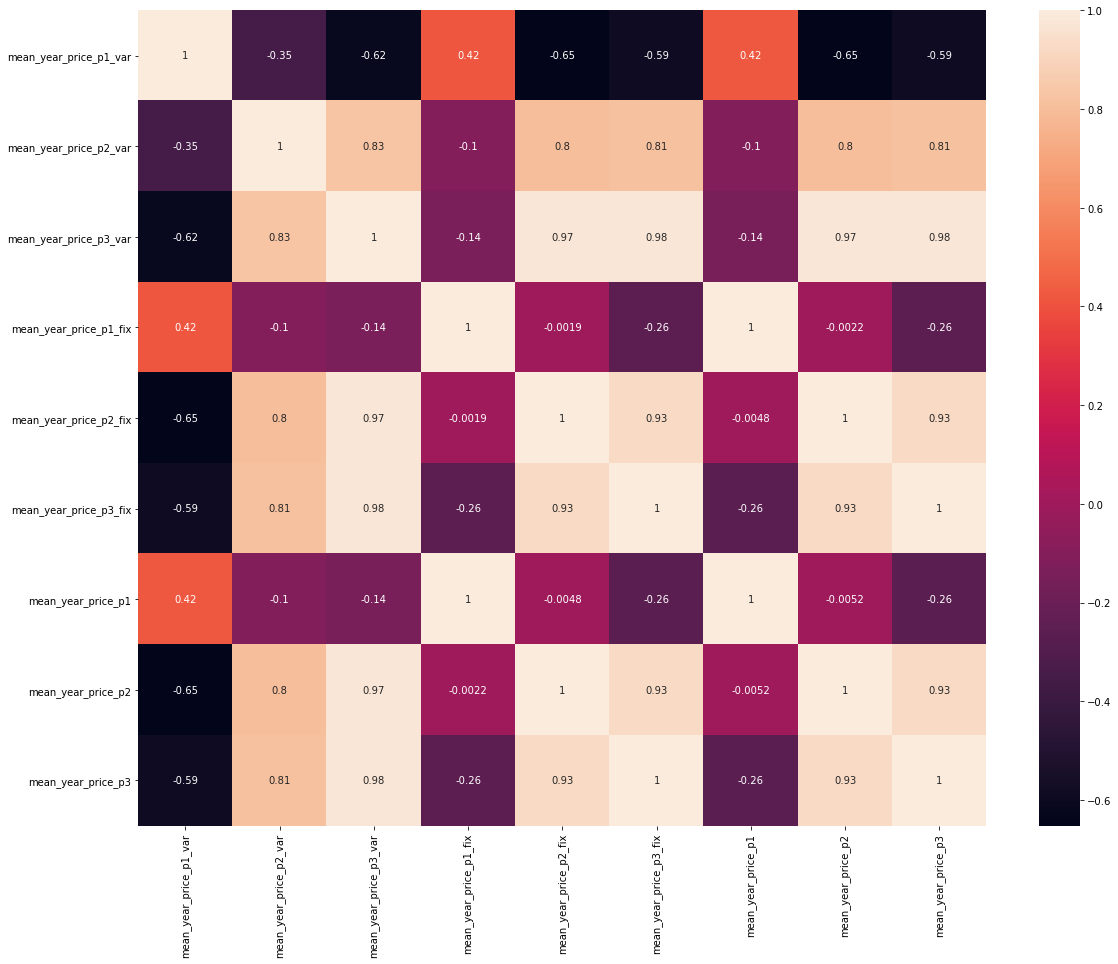

In [35]:
correlation = features.corr()
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [36]:
#CORRELATION TEST
Top_features = correlation[abs(correlation['mean_year_price_p1']>0.5)].index

print(Top_features)

Index(['mean_year_price_p1_fix', 'mean_year_price_p1'], dtype='object')


In [39]:
# Plot correlation
correlation = train.corr()

In [ ]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)